# Midyear Progress Review

10/2016-04/2017 (FY 2017 Q1 and Q2)

## Programatic Goals

+ Create methods for storing and comparing data from external and internal stakeholders in CTL. 


+ Create a server model for analyzing data using the Microwave Uncertainty Framework. 

+ Implement new methodologies for S-parameter and Power measurements including a database for check standards, updated measurement software, and cradle to grave support for on-wafer calibration kits. 

+ To reduce total time required to perform calibration measurements for technical staff.

+ The general reduction of overhead for programming. This includes faster and better solutions to data acquisition, data curration, analysis and report generation

## Detailed Progress 


+ Demonstrated a web based replacement for Calrep, the accepted calibration services error generation program, for both one and two port s-parameters. This web based service requires little to no user interaction speeding the process of report generation by approximately 10x.

In [1]:
from pyMeasure import *

Importing Code.Analysis.Fitting
It took 11.385 s to import Code.Analysis.Fitting
Importing Code.Analysis.Interpolation
It took 0.317 s to import Code.Analysis.Interpolation
Importing Code.Analysis.NISTUncertainty
It took 0.022 s to import Code.Analysis.NISTUncertainty
Importing Code.Analysis.SParameter
The module smithplot was not found,please put it on the python path
It took 14.897 s to import Code.Analysis.SParameter
Importing Code.Analysis.Uncertainty
It took 0.007 s to import Code.Analysis.Uncertainty
Importing Code.DataHandlers.GeneralModels
It took 0.013 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.GraphModels
It took 0.013 s to import Code.DataHandlers.GraphModels
Importing Code.DataHandlers.HTMLModels
It took 0.005 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.MUFModels
It took 0.006 s to import Code.DataHandlers.MUFModels
Importing Code.DataHandlers.NISTModels
It took 0.006 s to import Code.DataHandlers.NISTModels
Importing Co

In [22]:
# code example
data_directory=r'C:\Share\Ck_Std_raw_ascii'
raw_data=TwoPortRawModel(os.path.join(data_directory,"C07209.D3_051700"))
calrep_data=calrep(raw_data)

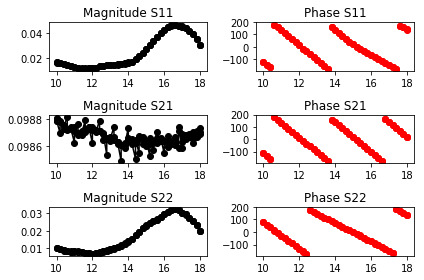

In [23]:
%matplotlib inline
# images
raw_data.show();

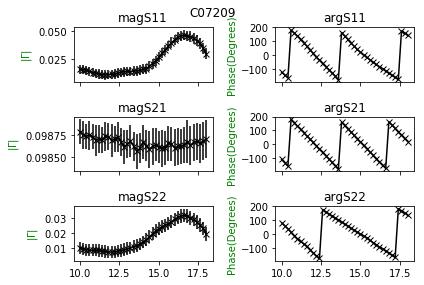

In [24]:
plot_calrep(calrep_data);

### Web based example
<a href="http://132.163.48.79:8000/Test_App/Calrep"> The Web App </a>

+ Developed advanced report generation for future integration with customer (internal and external) measurements and an automated quality management system. These reports will considerably reduce the burden of supporting the calibration services program in the future.

In [27]:
# code example
new_report=HTMLBase()
# here is some magic, all matplotlib plot commands return a figure instance by design
# we can transform any figure instance to an embedded html image and add it to the report
new_report.add_head()
new_report.add_body()

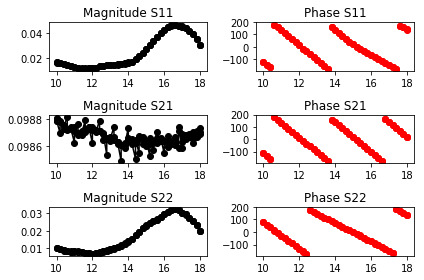

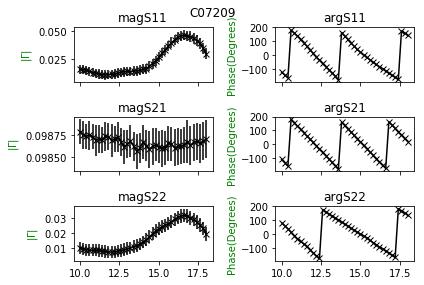

['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML


In [28]:
# put the plots into variables
raw_plot=raw_data.show();
calrep_plot=plot_calrep(calrep_data);
# get the transformation
image_graph=ImageGraph()
image_graph.set_state("MatplotlibFigure",raw_plot)
image_graph.move_to_node("embeddedHTML")
embedded_graph=image_graph.data;

In [29]:
new_report.append_to_body({"tag":"h2","text":"Raw Data"})
new_report.append_to_body(embedded_graph)
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmpqj26dr.html


In [30]:
image_graph.set_state("MatplotlibFigure",calrep_plot)
image_graph.move_to_node("embeddedHTML")
embedded_graph=image_graph.data;
new_report.append_to_body({"tag":"h2","text":"Processed Data"})
new_report.append_to_body(embedded_graph)
new_report.show()

['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embeddedHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embeddedHTML
file://c:/users/sandersa/appdata/local/temp/1/tmpsf792l.html


### We can even add an interactive html page simply...

In [31]:
# code example that transforms the data to xml and then html, finally adding
# it to the report
xml_calrep=AsciiDataTable_to_XmlDataTable(calrep_data)
html_calrep=xml_calrep.to_HTML(os.path.join(TESTS_DIRECTORY,"../XSL/TWO_PORT_CALREP_STYLE.xsl"))
html_for_report=HTMLBase(html_text=str(html_calrep))
new_report+html_for_report
new_report.show()

file://c:/users/sandersa/appdata/local/temp/1/tmphcihbt.html


+ Created a generalized standard error reduction scheme that allows the creation and visualization of standard error between two quantities with an uncertainty. This facilitates the comparison of s-parameter measurements of the same device from different systems or with different uncertainties. It is also useful in the comparison of corrections for systems calculated using different rf standards or software.

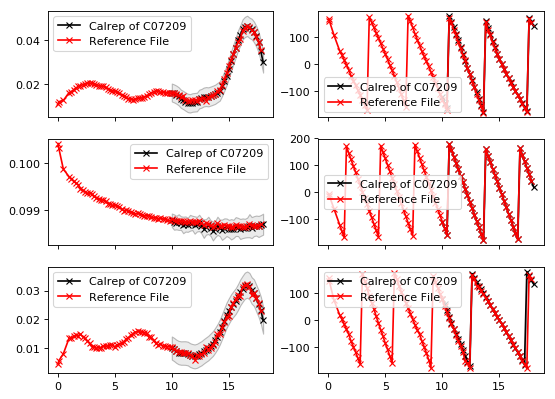

In [32]:
# code example
# lets load a mean response (results) file for this sample and compare it with the new normalized file
results_directory=r"C:\Share\resfiles"
results_file=ResultFileModel(os.path.join(results_directory,calrep_data.metadata["Device_Id"]))
results_comparison=plot_calrep_results_comparison(calrep_model=calrep_data,results_model=results_file);

['float', 'float', 'float', 'float', 'float', 'float', 'float']


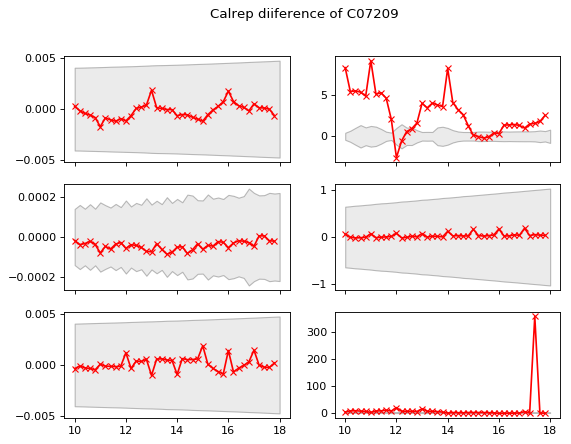

In [33]:
# or if we prefer the difference
difference_plot=plot_calrep_results_difference_comparison(calrep_model=calrep_data,results_model=results_file);

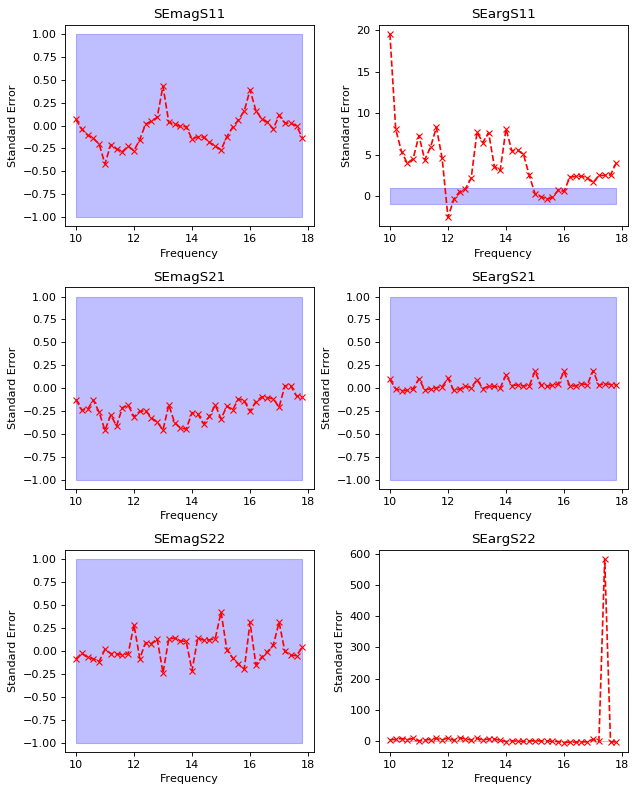

In [34]:
# now the standard error effectively normalizes to the uncertainty of a file
column_names=return_calrep_value_column_names(calrep_data)
error_column_names=return_calrep_error_column_names(column_names)   
standard_error=standard_error_data_table(calrep_data,results_file,
                                         table_1_uncertainty_column_names=error_column_names,
                                        value_column_names=column_names,expansion_factor=1)
standard_error_plot=standard_error.show()


+ Developed tools for calculating central estimates (means or medians) and calculating uncertainties (std, rss, mad, etc) from collections of data. Collections of data can be taken from sensitivity analysis, Monte Carlo analysis or databases of check standard data and output into excel, ods, matlab, html, csv and hp style formats. 

In [35]:
# take for instance calculating a mean and rss sum from a nominal value in the MUF and a sensitivity analysis
sensitvity_curve_mean=create_sensitivity_reference_curve(nominal_file_path=r"C:\Share\MUF_FILES\DUTs\Open_SOLT_Support\Open_SOLT_0.s2p",
                                                    sensitivity_directory=r"C:\Share\MUF_FILES\DUTs\Open_SOLT_Support\Covariance",
                                                        format="MA")

['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']


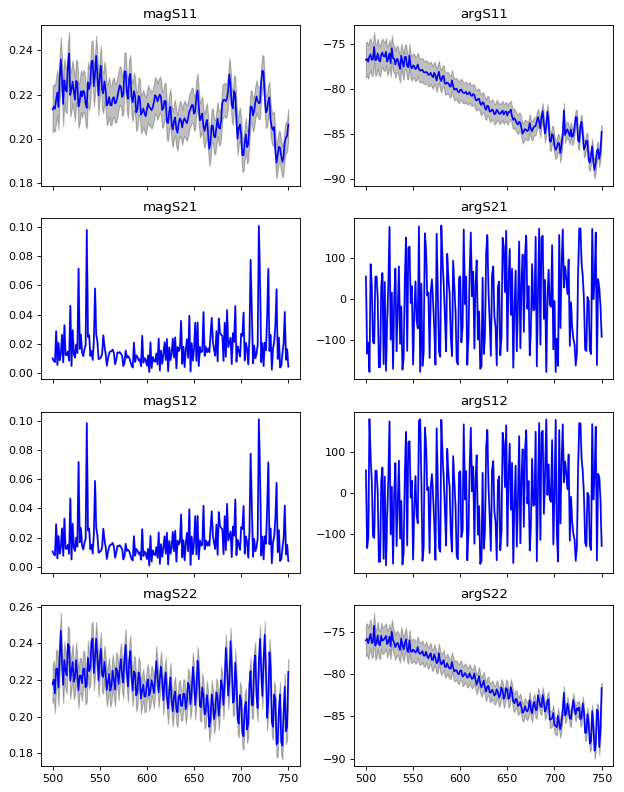

In [14]:
sensitivity_plot=plot_reference_curve(sensitvity_curve_mean)

In [41]:
# or a montecarlo result from the MUF
montecarlo_mean=create_monte_carlo_reference_curve(monte_carlo_directory=r"C:\Share\MUF_FILES\DUTs\Open_SOLT_Support\MonteCarlo",
                                                  format="MA")

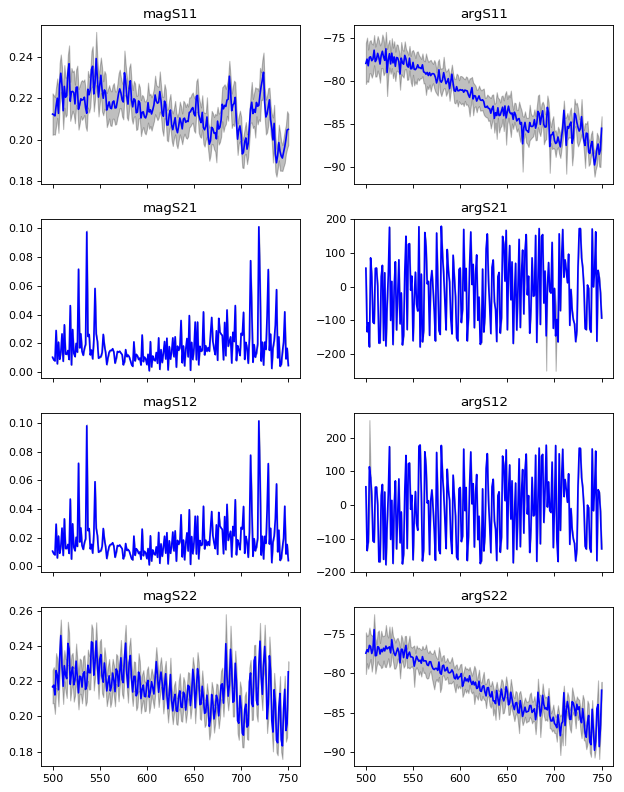

In [42]:
monte_carlo_plot=plot_reference_curve(montecarlo_mean);

In [43]:
# now we can compare using both uncertainty columns
standard_error_MUF=standard_error_data_table(montecarlo_mean,sensitvity_curve_mean,
                                         value_column_names=montecarlo_mean.options["value_column_names"],
                                        table_1_uncertainty_column_names=montecarlo_mean.options["uncertainty_column_names"],
                                        table_2_uncertainty_column_names=sensitvity_curve_mean.options["uncertainty_column_names"],
                                        expansion_factor=1,
                                        table_2_uncertainty_type="table")

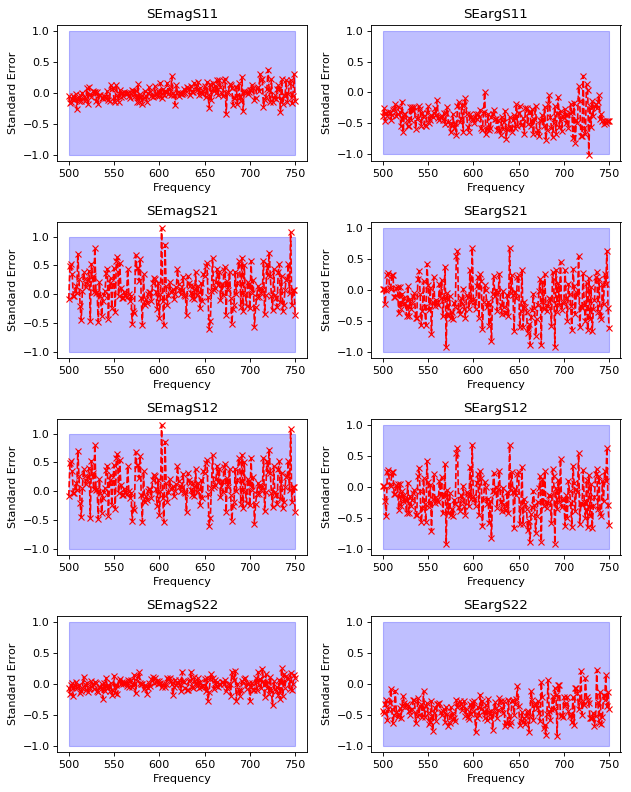

In [18]:
standard_error=standard_error_MUF.show();

### This works for snp where n can be anything ... and we can use html to report the findings or convert the findings to one of many formats. 

In [44]:
table_graph=TableGraph()
table_graph.set_state("AsciiDataTable",standard_error_MUF)
visit_all_nodes(table_graph)

['edge_AsciiDataTable_DataFrame_000']
moving AsciiDataTable -> DataFrame
['edge_DataFrame_AsciiDataTable_000']
moving DataFrame -> AsciiDataTable
['edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_HdfFile_000']
moving AsciiDataTable -> DataFrame
moving DataFrame -> HdfFile
['edge_HdfFile_DataFrame_000', 'edge_DataFrame_AsciiDataTable_000', 'edge_AsciiDataTable_XmlDataTable_000']
moving HdfFile -> DataFrame
moving DataFrame -> AsciiDataTable
moving AsciiDataTable -> XmlDataTable
equality_list is [True, False, True, False, False]
equality_list is [True, False, True, False, False]
['edge_XmlDataTable_AsciiDataTable_000', 'edge_AsciiDataTable_DataFrame_000', 'edge_DataFrame_ExcelFile_000']
moving XmlDataTable -> AsciiDataTable
moving AsciiDataTable -> DataFrame
moving DataFrame -> ExcelFile
['edge_ExcelFile_OdsFile_000']
moving ExcelFile -> OdsFile
['edge_OdsFile_ExcelFile_000', 'edge_ExcelFile_DataFrame_000', 'edge_DataFrame_HtmlString_000']
moving OdsFile -> ExcelFile
moving ExcelFile

### That line of code just converted our comparison to <a href="./test.html">html</a>, <a href="./Test.mat">mat</a>, <a href="./test.ods">ods</a>, <a href="./test.csv">csv</a>, <a href="./test.xlsx">excel</a>, <a href="./test.xml">xml</a>,<a href="./test.json"> json</a> , <a href="./test.hdf">hdf</a> and two in-memory formats for analysis in python.


In [20]:
visit_and_print_all_nodes(table_graph)

['edge_HtmlFile_HtmlString_000', 'edge_HtmlString_DataFrame_000']
moving HtmlFile -> HtmlString
moving HtmlString -> DataFrame
     Frequency  SEargS11  SEargS12  SEargS21  SEargS22  SEmagS11  SEmagS12  \
0       500.00 -0.383559  0.005785  0.005785 -0.448777 -0.060721 -0.089864   
1       501.25 -0.254133  0.004982  0.004982 -0.481194 -0.164202  0.488247   
2       502.50 -0.465803 -0.233130 -0.233130 -0.332871 -0.150751  0.516808   
3       503.75 -0.334600 -0.472056  0.001921 -0.259107 -0.094091  0.346024   
4       505.00 -0.381308  0.240234  0.240234 -0.594115 -0.056784 -0.040049   
5       506.25 -0.320525  0.267003  0.267003 -0.405711 -0.116310 -0.035534   
6       507.50 -0.315281  0.025874  0.025874 -0.315351 -0.017079  0.138525   
7       508.75 -0.445938  0.018991  0.018991 -0.079095 -0.270202  0.020439   
8       510.00 -0.369110  0.233103  0.233103 -0.414776 -0.080263  0.700218   
9       511.25 -0.293883  0.236750  0.236750 -0.639448 -0.127864  0.254788   
10      512.50 

Created documentation for back end software library that includes examples, source code presented in html. This documentation can be regenerated via script at any time to reflect recent changes.  <a href="https://aricsanders.github.io">Web based documentation</a>

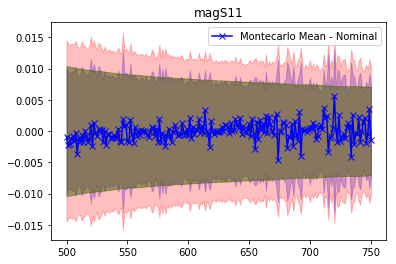

In [45]:
# in case Jim asks
# can we plot a subtracted version of montecarlo vs sensitivity
plt.figure()
PARAMETER="magS11"
y_MC=np.array(montecarlo_mean[PARAMETER])
y_S=np.array(sensitvity_curve_mean[PARAMETER])
error_MC=np.array(montecarlo_mean["u"+PARAMETER])
error_S=np.array(sensitvity_curve_mean["u"+PARAMETER])
plt.plot(montecarlo_mean["Frequency"],y_MC-y_S,"b-x",label="Montecarlo Mean - Nominal")

plt.fill_between(montecarlo_mean["Frequency"],-error_MC,+error_MC,color="b",
                       alpha=.25,
                       edgecolor="k")
plt.fill_between(sensitvity_curve_mean["Frequency"],-error_S,+error_S,color="g",
                       alpha=.5,
                       edgecolor="k")
plt.fill_between(sensitvity_curve_mean["Frequency"],-np.sqrt(error_MC**2+error_S**2),
                 +np.sqrt(error_MC**2+error_S**2),color="r",
                       alpha=.25,
                       edgecolor="k")
plt.title(PARAMETER)

plt.legend()
plt.show()